# **Problem Statement**

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

**Goals of the Case Study**

 - Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
 

 - There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# **Segment - I : Data Understanding**

## Importing the libraries and reading the dataset

In [427]:
# Importing the useful libraries and functions

# Suppress Warnings

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Import Numpy and Pandas Library

import pandas as pd
import numpy as np

# Import Matplotlib and Seaborn Libraries for Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas Inbuilt function to display all columns and rows present in Dataset

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

# Using sklearn library and importing train_test_split function to create Training & Test Datasets

from sklearn.model_selection import train_test_split

# Using sklearn library and importing StandardScaler function for feature scaling

from sklearn.preprocessing import StandardScaler

# Using sklearn library and importing RFE and LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Importing statsmodel library

import statsmodels.api as sm

# Using statsmodel library and importing variance inflation factor (VIF) function for calculating VIF.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Using sklearn library and importing metrics function for using various metrics available to evalaute the model.

from sklearn import metrics

# Using sklearn library and importing various metrics to evaluate the model.

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Using sklearn library and importing precison recall curve to find optimal cutoff.

from sklearn.metrics import precision_recall_curve

In [428]:
# Reading the dataset

leads = pd.read_csv("Leads.csv")

In [429]:
# Printing the first five rows of the dataframe 'leads'

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data inspection

### Basic structure checking

In [430]:
# Checking the shape of dataframe

leads.shape

(9240, 37)

**There are 9240 rows and 37 columns initially.**

In [431]:
# Printing information about the attributes of 'leads'

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [432]:
# Checking the size of dataframe

leads.size

341880

In [433]:
# Finding the basic statistics for numerical variables

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Checking missing values and duplicated rows

In [434]:
# Calculating the missing values in each column of the dataframe

leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [435]:
# Calculating the percentage of missing values in each column

round(100*(leads.isnull().sum())/len(leads), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [436]:
# Checking for duplicated rows

leads.duplicated().sum()

0

In [437]:
# Comparing the shapes of orginal dataframe before and after dropping the duplicates.

leads.shape,leads.drop_duplicates().shape

((9240, 37), (9240, 37))

***Observation:***

**There are no duplicated rows in this dataframe. The same is verified by checking the shape of the dataframe before and after dropping duplicates, if any.**

## **Data cleaning**


In [438]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [439]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Checking value counts for each categorical column

In [440]:
var_list = ['Lead Origin','Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity', 'Country', 
            'Specialization', 'How did you hear about X Education', 'What is your current occupation', 
            'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 
            'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
            'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 
            'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
            'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


for i in var_list:
    ans=leads[i].value_counts(dropna=False)
    print(f"{i} Count:\n\n{ans}",end='\n\n')
    print('--'*50)
    

Lead Origin Count:

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

----------------------------------------------------------------------------------------------------
Lead Source Count:

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

-------------------------------------------------------------

**Observation:**

**There are value named 'Select' in columns like 'Specialization', 'How did you hear about X Education', 'Lead Profile', etc. This is because the site visitors have not selected any response for this and it is as good as 'NaN' or a null value. Hence, replacing 'Select' with NaN.**

### Replacing 'Select' with NaN

In [441]:
# Replacing 'Select' with NaN since no option is selected for these values

leads = leads.replace('Select',np.nan)

### Dropping columns having more than 35% null values

In [442]:
# Finding missing value percentage in each column

null_percent = round(100*(leads.isnull().sum())/len(leads), 2).sort_values(ascending=False)
print(null_percent)

# List of columns having more than 35% null values.

null_percent[null_percent > 35].index

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Index(['How did you hear about X Education', 'Lead Profile', 'Lead Quality',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'City',
       'Specialization', 'Tags'],
      dtype='object')

**Approach :**

**1. Dropping all the columns that have extremely high missing values. Considering that value as 35% in this case study.**

In [443]:
# Dropping columns having more than 35% of null values

leads = leads.drop(null_percent[null_percent > 35].index , axis= 1)

# Checking the shape again after dropping columns
leads.shape

(9240, 27)

### Checking the number of unique values in each column

In [444]:
# Finding the number of unique values in each column

leads.nunique().sort_values()

Receive More Updates About Our Courses              1
I agree to pay the amount through cheque            1
Magazine                                            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Search                                              2
A free copy of Mastering The Interview              2
Newspaper                                           2
Digital Advertisement                               2
X Education Forums                                  2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
Through Recommendations                             2
What matters most to you in choosing a course       3
Lead Origin                                         5
What is your current occupation                     6
Last Notable Activity       

**Observation:**

1. There are columns which have just one unique value and these will not play any significant role in further analysis. Hence, dropping those columns.

In [445]:
# Dropping unique valued columns

leads= leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                   'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)
leads.shape

(9240, 22)

In [446]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


### Dropping unnecessary columns and corresponding rows

In [447]:
# Finding rows which have all null values.

leads[leads.isnull().all(axis=1)].shape

(0, 22)

**There are no rows available in the dataframe which have all null values present in it.**

**'Prospect ID' and 'Lead Number' is the unique ID and a lead number assigned to each lead, with which the customer is identified. These are all unique values for each customer, hence dropping these columns as they will not provide any insight to the analysis.**

In [448]:
# Dropping 'Lead Number' and 'Prospect ID'.

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
leads.shape

(9240, 20)

In [449]:
# Checking null value percentage in each column

round(100*(leads.isnull().sum())/len(leads),2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Lead Origin                                       0.00
Search                                            0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Ema

**Country**

In [450]:
# Checking the unique categories in 'Country'

leads['Country'].value_counts(normalize=True,dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

**It can be seen, more than 70% of the entries are from 'India' and more than 26% are missing values, hence dropping this column as it will not provide anything significant in the analysis.**

In [451]:
# Dropping column 'Country'

leads.drop(['Country'], 1, inplace = True)
leads.shape

(9240, 19)

In [452]:
# Checking null value percentage in each column

round(100*(leads.isnull().sum())/len(leads),2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Lead Origin                                       0.00
Search                                            0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Last Notab

**What is your current occupation**

In [453]:
# Checking the unique value counts for the column 'What is your current occupation'

leads['What is your current occupation'].value_counts(normalize=True, dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [454]:
# Since the number of missing values is high in 'What is your current occupation', replacing 'NaN' with "Unspecified" 


leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,"Unspecified")
leads.rename(columns = {'What is your current occupation':'Occupation'}, inplace = True)
leads['Occupation'].isnull().sum()

0

In [455]:
leads['Occupation'].value_counts(normalize=True, dropna=False)

Unemployed              0.606061
Unspecified             0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: Occupation, dtype: float64

In [456]:
leads.shape

(9240, 19)

In [457]:
# Checking null value percentage in each column

round(100*(leads.isnull().sum())/len(leads),2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Occupation                                        0.00
Search                                            0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Last Notab

**What matters most to you in choosing a course**

In [458]:
# Checking the unique value counts for the column 'What matters most to you in choosing a course'

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [459]:
# Since the missing values are less in number, replacing "NaN" with "Other" in the column
# 'What matters most to you in choosing a course' 

leads['What matters most to you in choosing a course'].replace(np.nan,"Other",inplace = True)

# Renaming the column to "Course Motto" for easier interpretation

leads.rename(columns = {'What matters most to you in choosing a course':'Course Motto'}, inplace = True)
leads['Course Motto'].isnull().sum()

0

In [460]:
leads['Course Motto'].value_counts(dropna=False)

Better Career Prospects      6528
Other                        2710
Flexibility & Convenience       2
Name: Course Motto, dtype: int64

**There are columns which have very less missing values. These rows can be imputed with their mean,median or mode values, as and when necessary**

**Lead Source**

In [461]:
leads['Lead Source'].value_counts(dropna=False, normalize=True)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

In [462]:
# Dropping the null valued rows in the column 'Lead Source'

leads=leads[~pd.isnull(leads['Lead Source'])]

In [463]:
# Combining categories of very low percentage as "Others"

def lead_source_categories(x):
    
    if x in  ['Google','google']:
        return 'Google'
    elif x in ['Facebook','Social Media']:
        return 'Social Media'
    elif x == 'Direct Traffic':
        return 'Direct Traffic'
    elif x == 'Olark Chat':
        return 'Olark Chat'
    elif x == 'Organic Search':
        return 'Organic Search'
    elif x == 'Reference':
        return 'Reference'
    else:
        return 'Others'

leads['Lead Source'] = leads['Lead Source'].apply(lead_source_categories)
leads['Lead Source'].value_counts(normalize=True)

Google            0.312147
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.031291
Social Media      0.006193
Name: Lead Source, dtype: float64

**TotalVisits**

In [464]:
leads['TotalVisits'].isnull().sum()

130

In [465]:
# Checking for mean and median values

print(leads['TotalVisits'].mean())
print(leads['TotalVisits'].median())

3.456028212475204
3.0


In [466]:
# Imputing the null valued rows in the column 'TotalVisits' with its median value

leads['TotalVisits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].median())
leads['TotalVisits'].isnull().sum()

0

**Page Views Per Visit**

In [467]:
leads['Page Views Per Visit'].isnull().sum()

130

In [468]:
# Checking for mean and median values

print(leads['Page Views Per Visit'].mean())
print(leads['Page Views Per Visit'].median())

2.370150980824334
2.0


In [469]:
# Imputing the null valued rows in the column 'Page Views Per Visit' with its median value


leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median())
leads['Page Views Per Visit'].isnull().sum()

0

**Last Activity**

In [470]:
leads['Last Activity'].value_counts(dropna=False, normalize=True)

Email Opened                    0.372881
SMS Sent                        0.295850
Olark Chat Conversation         0.105715
Page Visited on Website         0.069535
Converted to Lead               0.046502
Email Bounced                   0.034876
Email Link Clicked              0.029009
Form Submitted on Website       0.012603
NaN                             0.010973
Unreachable                     0.010104
Unsubscribed                    0.006410
Had a Phone Conversation        0.003259
Approached upfront              0.000978
View in browser link Clicked    0.000652
Email Received                  0.000217
Email Marked Spam               0.000217
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [471]:
leads['Last Activity'].value_counts().index

Index(['Email Opened', 'SMS Sent', 'Olark Chat Conversation',
       'Page Visited on Website', 'Converted to Lead', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront',
       'View in browser link Clicked', 'Email Received', 'Email Marked Spam',
       'Visited Booth in Tradeshow', 'Resubscribed to emails'],
      dtype='object')

In [472]:
# Combining categories in the column 'Last Activity' for value counts less than ~1%

leads['Last Activity'] = leads['Last Activity'].replace([np.nan,'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront',
       'View in browser link Clicked', 'Email Received', 'Email Marked Spam',
       'Visited Booth in Tradeshow', 'Resubscribed to emails'],'Others')

leads['Last Activity'].value_counts(normalize=True)

Email Opened                 0.372881
SMS Sent                     0.295850
Olark Chat Conversation      0.105715
Page Visited on Website      0.069535
Converted to Lead            0.046502
Email Bounced                0.034876
Others                       0.033029
Email Link Clicked           0.029009
Form Submitted on Website    0.012603
Name: Last Activity, dtype: float64

**Last Notable Activity**

In [473]:
leads['Last Notable Activity'].value_counts(dropna=False, normalize=True)

Modified                        0.369079
Email Opened                    0.306714
SMS Sent                        0.233811
Page Visited on Website         0.034550
Olark Chat Conversation         0.019883
Email Link Clicked              0.018796
Email Bounced                   0.006519
Unsubscribed                    0.004889
Unreachable                     0.003477
Had a Phone Conversation        0.001521
Email Marked Spam               0.000217
Approached upfront              0.000109
Resubscribed to emails          0.000109
View in browser link Clicked    0.000109
Form Submitted on Website       0.000109
Email Received                  0.000109
Name: Last Notable Activity, dtype: float64

In [474]:
leads['Last Notable Activity'].value_counts().index

Index(['Modified', 'Email Opened', 'SMS Sent', 'Page Visited on Website',
       'Olark Chat Conversation', 'Email Link Clicked', 'Email Bounced',
       'Unsubscribed', 'Unreachable', 'Had a Phone Conversation',
       'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails',
       'View in browser link Clicked', 'Form Submitted on Website',
       'Email Received'],
      dtype='object')

In [475]:
# Combining categories in the column 'Last Notable Activity' for value counts less than ~1%

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced',
       'Unsubscribed', 'Unreachable', 'Had a Phone Conversation',
       'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails',
       'View in browser link Clicked', 'Form Submitted on Website',
       'Email Received'], 'Others')

leads['Last Notable Activity'].value_counts(normalize=True)
    

                                                                        

Modified                   0.369079
Email Opened               0.306714
SMS Sent                   0.233811
Page Visited on Website    0.034550
Olark Chat Conversation    0.019883
Email Link Clicked         0.018796
Others                     0.017166
Name: Last Notable Activity, dtype: float64

**'Newspaper' and 'Newspaper Article'**

In [476]:
print(leads['Newspaper'].value_counts(normalize=True))
print('\n\n')
print(leads['Newspaper Article'].value_counts(normalize=True))

No     0.999891
Yes    0.000109
Name: Newspaper, dtype: float64



No     0.999783
Yes    0.000217
Name: Newspaper Article, dtype: float64


**'Newspaper' and 'Newspaper Article' have almost similar results, and more than 99.98% values are marked 'No'. So dropping these two columns as it will give nothing significant**

In [477]:
# Dropping column 'Newspaper' and 'Newspaper Article'

leads.drop(['Newspaper','Newspaper Article'], 1, inplace = True)
leads.shape

(9204, 17)

In [478]:
# Checking null value percentage in each column

round(100*(leads.isnull().sum())/len(leads),2).sort_values(ascending=False)

Lead Origin                               0.0
Occupation                                0.0
A free copy of Mastering The Interview    0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
X Education Forums                        0.0
Search                                    0.0
Course Motto                              0.0
Last Activity                             0.0
Lead Source                               0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Last Notable Activity                     0.0
dtype: float64

In [479]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Occupation', 'Course Motto',
       'Search', 'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [480]:
var_list = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted','Last Activity', 'Occupation', 'Course Motto',
       'Search', 'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity']


for i in var_list:
    ans=leads[i].value_counts(dropna=False, normalize=True)
    print(f"{i} Count:\n\n{ans}",end='\n\n')
    print('--'*50)

Lead Origin Count:

Landing Page Submission    0.530748
API                        0.388961
Lead Add Form              0.074424
Lead Import                0.005867
Name: Lead Origin, dtype: float64

----------------------------------------------------------------------------------------------------
Lead Source Count:

Google            0.312147
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.031291
Social Media      0.006193
Name: Lead Source, dtype: float64

----------------------------------------------------------------------------------------------------
Do Not Email Count:

No     0.921664
Yes    0.078336
Name: Do Not Email, dtype: float64

----------------------------------------------------------------------------------------------------
Do Not Call Count:

No     0.999783
Yes    0.000217
Name: Do Not Call, dtype: float64

------------------------------------------------------------------------------

**'Do Not Call','Search', 'X Education Forums','Digital Advertisement','Through Recommendations' have 99.9% single value, which signifies very high data imbalance. Hence, dropping these columns as they will not add any significance to the model building.**

In [481]:
# Dropping column 'Do Not Call','Search', 'X Education Forums','Digital Advertisement','Through Recommendations'

leads.drop(['Do Not Call','Search', 'X Education Forums','Digital Advertisement','Through Recommendations'], 1, 
           inplace = True)
leads.shape

(9204, 12)

In [482]:
# Finding the percentage of rows(data) retained after data cleaning

(leads.shape[0]/9240)*100

99.61038961038962

**The data is now free from any missing value and we have retained 99% of the data after data cleaning process.**

# **Segment - II : Exploratory Data Analysis**

## Segregating continuous and categorical variables

In [483]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9204 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9204 non-null   object 
 3   Converted                               9204 non-null   int64  
 4   TotalVisits                             9204 non-null   float64
 5   Total Time Spent on Website             9204 non-null   int64  
 6   Page Views Per Visit                    9204 non-null   float64
 7   Last Activity                           9204 non-null   object 
 8   Occupation                              9204 non-null   object 
 9   Course Motto                            9204 non-null   object 
 10  A free copy of Mastering The Interview  9204 non-null   obje

In [484]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Occupation,Course Motto,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,Modified


In [485]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Occupation', 'Course Motto',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [486]:
# Separating continuous and categorical columns

cont_cols=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Occupation', 'Course Motto',
            'A free copy of Mastering The Interview', 'Last Notable Activity']

target=['Converted']

len(cont_cols)+len(cat_cols)+len(target)

12

## Checking data imbalance in target variable

In [487]:
leads.Converted.value_counts(normalize=True, dropna=False)

0    0.616254
1    0.383746
Name: Converted, dtype: float64

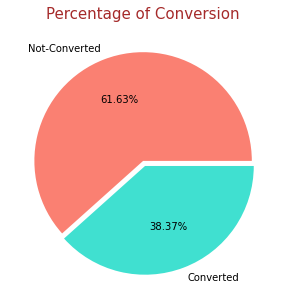

In [488]:
# Plotting the percentage of conversion in TARGET column

plt.figure(figsize=[5,5])
plt.pie(leads.Converted.value_counts(normalize=True), labels= ['Not-Converted', 'Converted'], 
        autopct='%.2f%%', explode=(0,0.05), colors=['salmon','turquoise'])
plt.title("Percentage of Conversion", fontsize=15, color= 'brown')
plt.show()


**Observations and Recommendations :**

**1. 38.37% of the total leads have converted and 61.63% have not converted.**

**2. There is some Data imbalance in the target column - "Converted" , but it is is not that large to produce biased results.**

**3. Stratified sampling can be used to handle this imbalance.**

## Univariate Analysis

### Univariate Analysis on Continuous columns

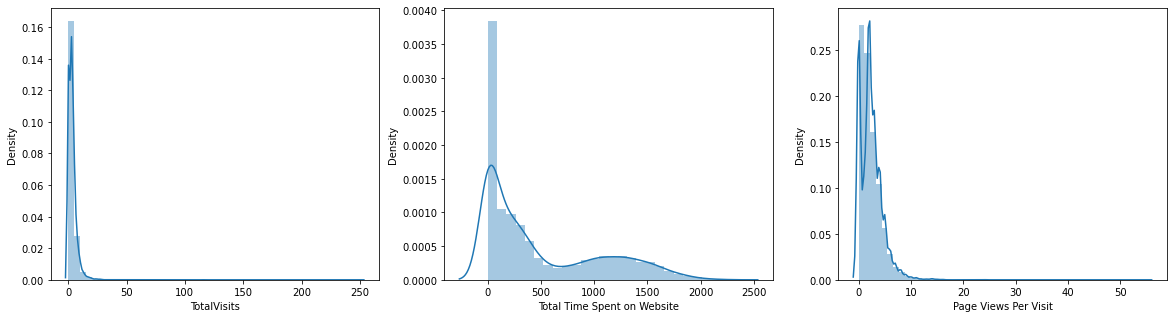

In [489]:
# Plotting distribution curve for continuous columns

plt.figure(figsize=(20,5))
for num in enumerate(cont_cols):
    plt.subplot(len(cont_cols)//2,3,num[0]+1)
    sns.distplot(leads[num[1]])
plt.show()

**Observations:**

**1. The total number of visits made by the customer on the website is mostly between 0-30.**


**2. The total time spent by the customer on the website is high in the beginning with a gradual decrease, then again rising slightly. It is possible that customers who are likely to convert are re-visiting the website.**


**3. Page views per visit lies mostly in the range of 0-10.**

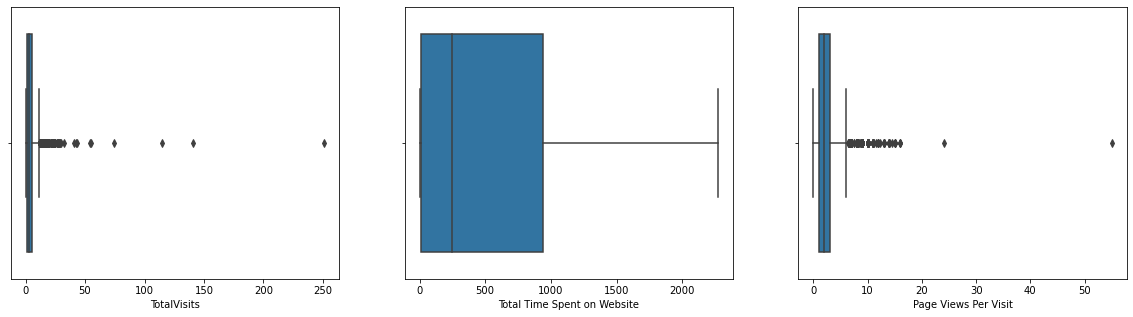

In [490]:
# Plotting boxplot on continuous columns for outlier detection

plt.figure(figsize=(20,5))
for num in enumerate(cont_cols):
    plt.subplot(len(cont_cols)//2,3,num[0]+1)
    sns.boxplot(leads[num[1]])
plt.show()

**Observation: Outliers are present but it is not very dominant.**

In [491]:
len(cat_cols)

8

### Univariate Analysis on Categorical columns

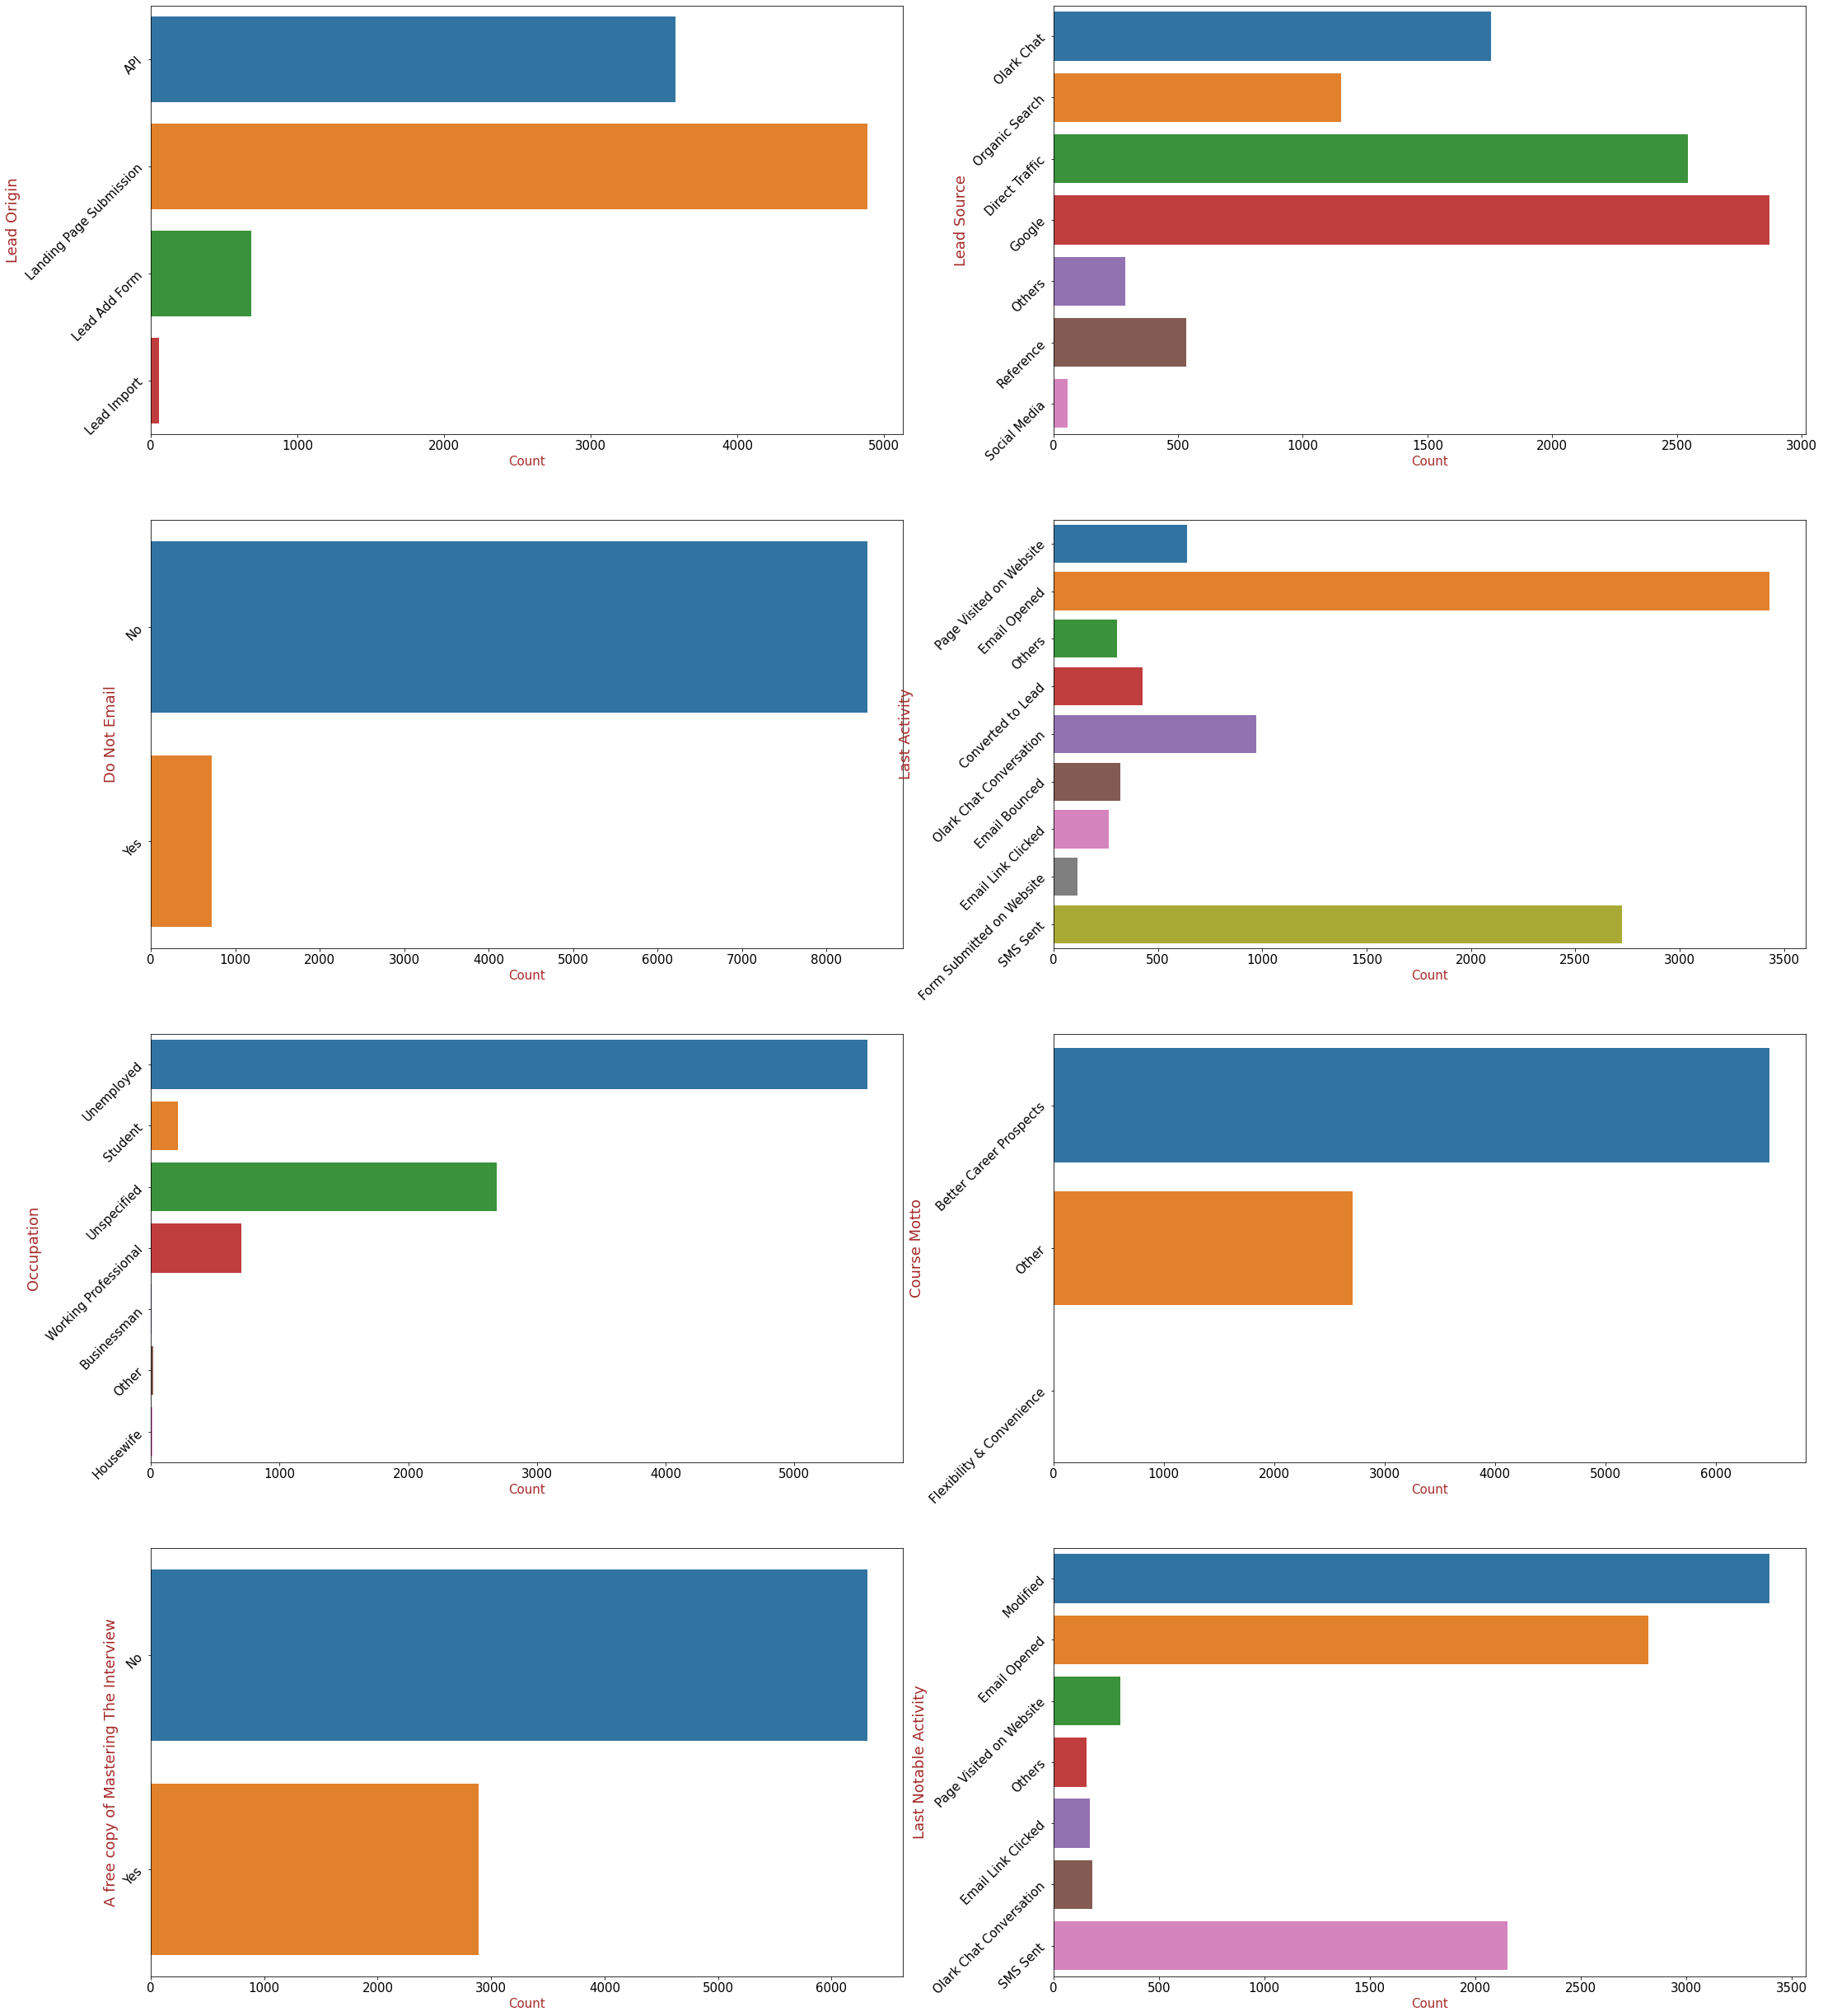

In [492]:
# Plotting Countplot for univariate analysis of categorical columns
 
plt.figure(figsize=(36,44))
for cat in enumerate(cat_cols):
    plt.subplot(4,2,cat[0]+1)
    sns.countplot(y = leads[cat[1]])
    plt.ylabel(cat[1], fontsize=18, fontweight=5, color='Brown')
    plt.xlabel("Count",fontsize=15, fontweight=5, color='Brown')
    plt.xticks(rotation=0, fontsize=15)
    plt.yticks(rotation=45, fontsize=15)
plt.show()


**Observations:**

**1. Google as the source of the lead is higher in number, followed by direct traffic.**

**2. Very less number of people have asked to send emails.**

**3. Most people have opened the email in their last activity.**

**4. Unemployed people are more in number among the pool of leads.**

**5. Most people look for a course for getting better career prospects.**

## Bivariate Analysis

### Bivariate analysis of continuous variables with respect to target variable 'Converted'

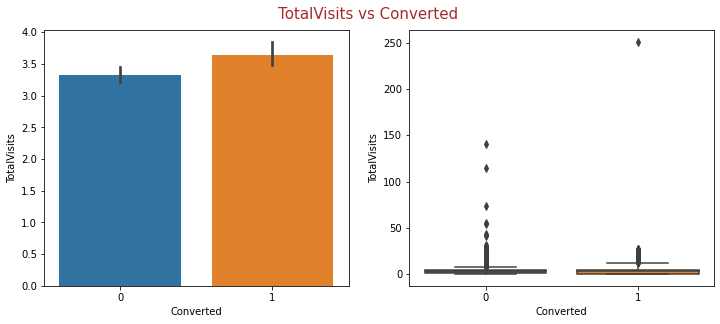

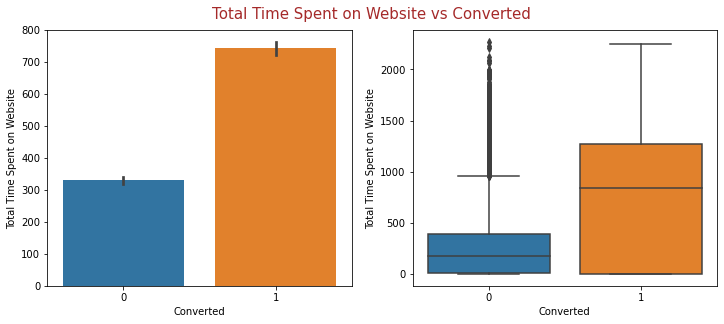

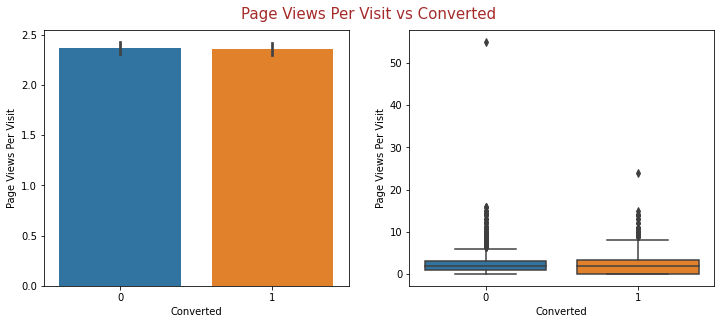

In [493]:
# Analysing all continuous columns with respect to the target variable 'Converted' using bar plot and box plot

for num in enumerate(cont_cols):
    plt.figure(figsize=(12,16))
    plt.subplot(len(cont_cols),num[0]+1,1)
    plt.suptitle(num[1] +" vs Converted", x=0.5, y=0.9, fontsize=15, fontweight=5,color='Brown')
    
    for pos in range(len(cont_cols)):
        plt.subplot(pos+1,2,1)
        sns.barplot(leads["Converted"],leads[num[1]])
        plt.subplot(pos+1,2,2)
        sns.boxplot(leads["Converted"],leads[num[1]])
plt.show()


**Observations:**

**1. People with higher number of 'TotalVisits' seem to have converted more.**

**2. 'Total Time Spent on Website' by people who have converted is significantly higher than people who have not converted.**

**3. 'Page Views Per Visit' does not make any difference to the conversion.**

### Bivariate analysis of categorical variables with respect to target variable 'Converted'


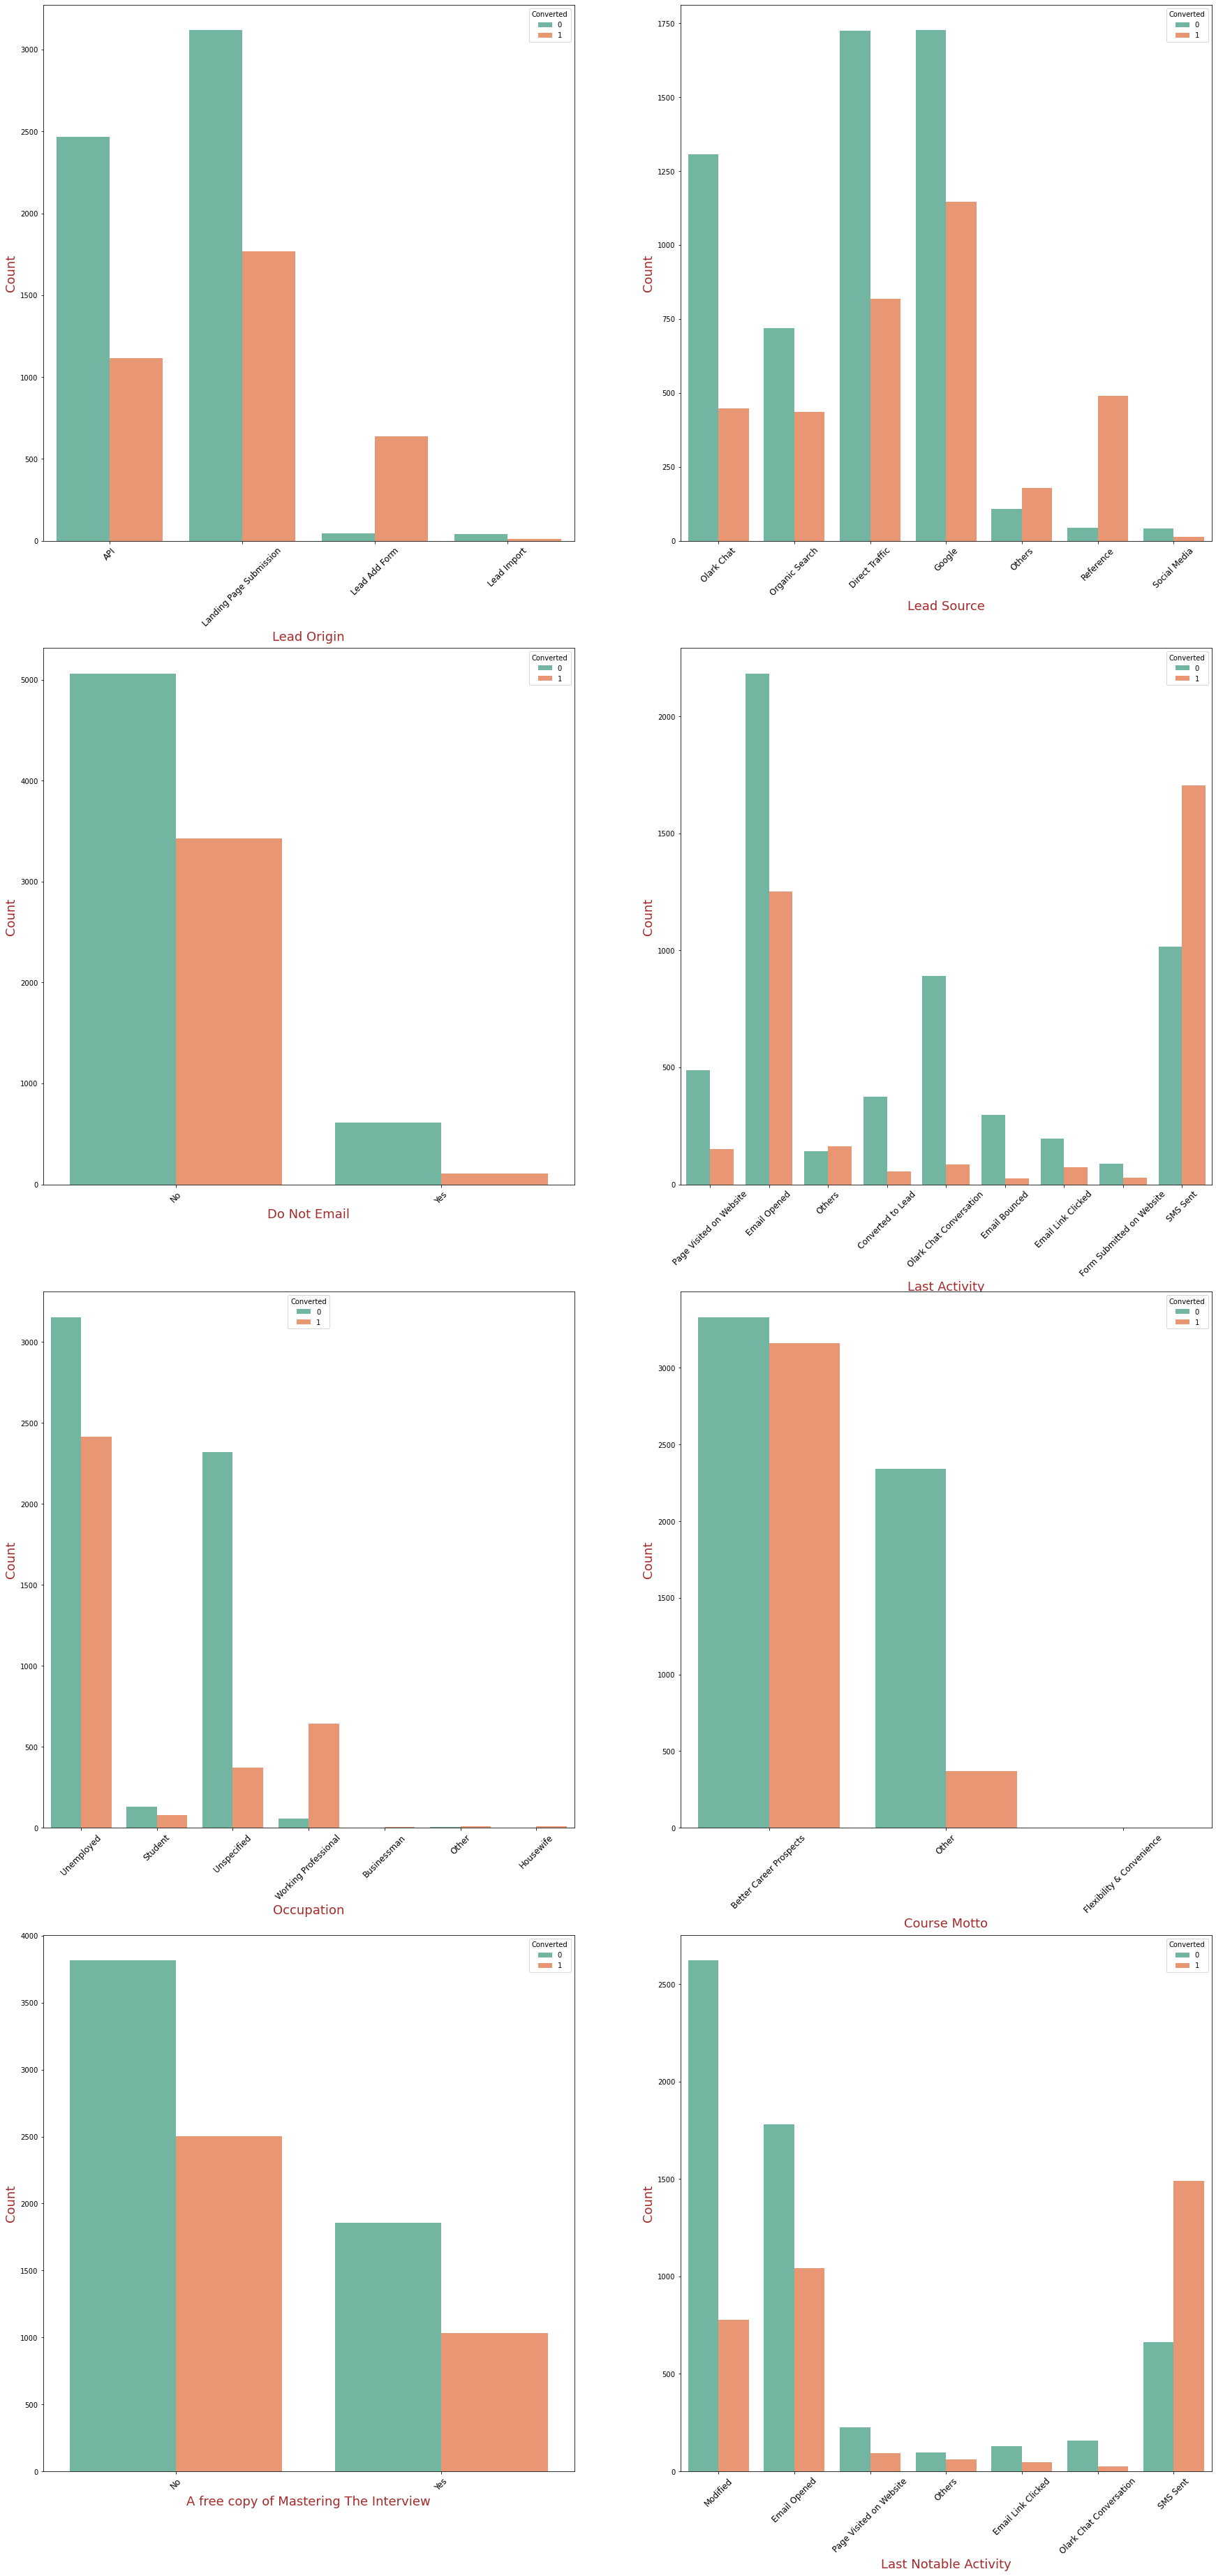

In [494]:
# Analysing the count of all categorical columns with respect to the target variable 'Converted' using count plot

plt.figure(figsize=(30,65))
for cat in enumerate(cat_cols):
    plt.subplot(4,2,cat[0]+1)
    sns.countplot(data = leads, x=cat[1],hue='Converted', palette='Set2')
    plt.xlabel(cat[1], fontsize=18, fontweight=5, color='Brown')
    plt.ylabel("Count", fontsize=18, fontweight=5, color='Brown')
    plt.xticks(fontsize=12, rotation=45)
plt.show()


**Observations:**

**1. Most people who have converted have 'Google' as a source of lead.**

**2. People who have not converted to customers have asked not to email.**

**3. Most leads have usually opened their emails or sent an SMS as their last activity.**

**4. Unemployed people are higher in number for both converted and non-converted.**

**5. People who are looking for better career prospects are more likely to be converted as customers.**

**6. People who have not converted to customers have asked not to share the free copy of mastering the interview.**

## Multivariate Analysis

### Correlation of  numerical variable

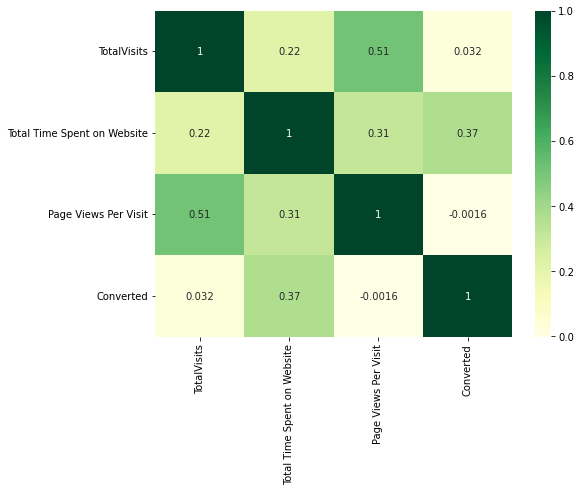

In [495]:
# Plotting a Heatmap for finding correlation of numerical variables, including the target variable.

plt.figure(figsize=(8,6))
sns.heatmap(leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']].corr(),cmap="YlGn", annot=True)
plt.show()


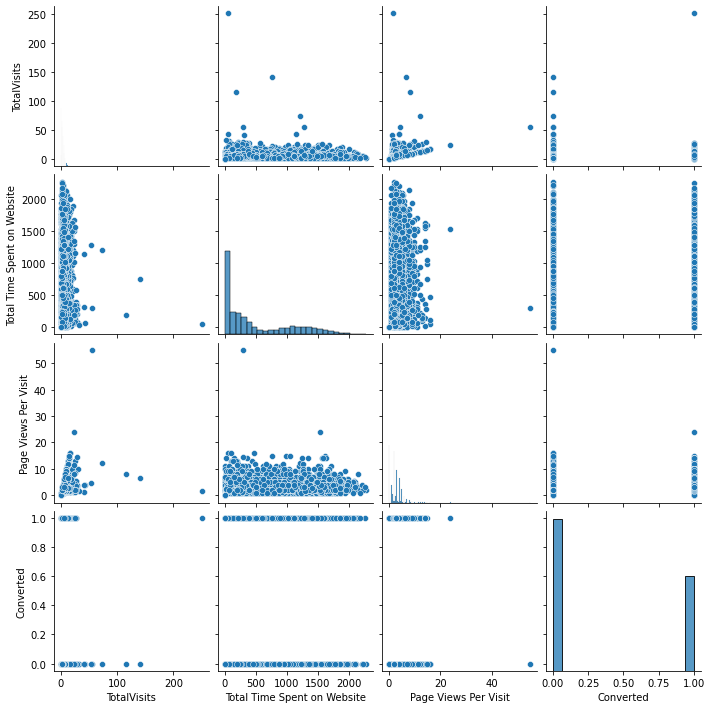

In [496]:
# Plotting a pairplot for checking correlation of numerical variables including the target variable.

sns.pairplot(data=leads, vars=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted'])
plt.show()


**Observation:**

**1. 'Page Views Per Visit' and 'TotalVisits' are moderately correlated.**

# **Segment - III : Data Preparation For Model Building**

## Pre-processing steps

In [497]:
leads.shape

(9204, 12)

In [498]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Occupation,Course Motto,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,Modified


### Converting some binary variables (Yes/No) to 1/0

In [499]:
# List of variables to map

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list

leads[varlist] = leads[varlist].apply(binary_map)


### Creating dummy variables

**For categorical variables with multiple levels, creating dummy features (one-hot encoded)**

In [500]:
print(cat_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Occupation', 'Course Motto', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [501]:
leads.nunique()

Lead Origin                                  4
Lead Source                                  7
Do Not Email                                 2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1730
Page Views Per Visit                       114
Last Activity                                9
Occupation                                   7
Course Motto                                 3
A free copy of Mastering The Interview       2
Last Notable Activity                        7
dtype: int64

**Creating dummy variables for categorical columns that have more than 2 unique categories.**

In this 'leads' dataset, we will create dummies for the following categorical columns  - 'Lead Origin', 'Lead Source', 'Last Activity','Occupation', 'Course Motto', 'Last Notable Activity'

***Steps followed :***

 - Getting the dummy variables for the feature and storing it in a new variable.
 
 
 - Dropping a redundant dummy variable since (n-1) dummies can explain n categories.
 
 
 - Adding the results to the original dataframe.
 
 
 - Dropping the original column for which the dummies are created.


In [502]:
# Creating dummy variables for the columns 'Lead Origin', 'Lead Source', 'Last Activity', 'Occupation', 'Course Motto', 'Last Notable Activity'
# Simultaneously dropping a redundant dummy variable

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Occupation', 'Course Motto', 
                              'Last Notable Activity']], drop_first=True)


# Concatenating the results to the original 'leads' dataframe

leads = pd.concat([leads, dummy], axis=1)
leads.shape

(9204, 43)

In [503]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Occupation,Course Motto,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Social Media,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unspecified,Occupation_Working Professional,Course Motto_Flexibility & Convenience,Course Motto_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,Email Opened,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Unemployed,Better Career Prospects,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [504]:
# Dropping 'Lead Origin', 'Lead Source', 'Last Activity', 'Occupation', 'Course Motto', 'Last Notable Activity'
# as we have created dummies for these columns

leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Occupation', 'Course Motto',
            'Last Notable Activity'], axis = 1, inplace = True)

leads.shape

(9204, 37)

In [505]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Social Media,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unspecified,Occupation_Working Professional,Course Motto_Flexibility & Convenience,Course Motto_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [506]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Do Not Email                                   9204 non-null   int64  
 1   Converted                                      9204 non-null   int64  
 2   TotalVisits                                    9204 non-null   float64
 3   Total Time Spent on Website                    9204 non-null   int64  
 4   Page Views Per Visit                           9204 non-null   float64
 5   A free copy of Mastering The Interview         9204 non-null   int64  
 6   Lead Origin_Landing Page Submission            9204 non-null   uint8  
 7   Lead Origin_Lead Add Form                      9204 non-null   uint8  
 8   Lead Origin_Lead Import                        9204 non-null   uint8  
 9   Lead Source_Google                             9204 

## Data Splitting

### Dividing data into X and y

In [507]:
# Separating X and y for 'leads' dataset

X = leads.drop(columns = 'Converted')
y = leads['Converted']


In [508]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Social Media,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unspecified,Occupation_Working Professional,Course Motto_Flexibility & Convenience,Course Motto_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [509]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Splitting the Data into 'Training' and 'Testing' Sets


**The first basic step for regression is performing a train-test split.**

In [510]:
# Splitting dataframe into train and test sets, in 70:30 ratio for train and test respectively.

np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size =0.7, test_size = 0.3, random_state = 100, stratify=y)

In [511]:
# Checking shape of training and testing datasets

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(6442, 36)
(6442,)
(2762, 36)
(2762,)


In [512]:
y_train.value_counts()

0    3970
1    2472
Name: Converted, dtype: int64

In [513]:
y_test.value_counts()

0    1702
1    1060
Name: Converted, dtype: int64

## Rescaling the Features

 **Rescaling the features so that the units of the coefficients obtained are all on the same scale.**

In [514]:
# Using StandardScaler() for rescaling

scaler = StandardScaler()

In [515]:
cont_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [516]:
# Applying scaler() to all the columns except binary values (0-1) and 'dummy' variables of Training dataset

X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Social Media,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unspecified,Occupation_Working Professional,Course Motto_Flexibility & Convenience,Course Motto_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6063,0,-0.663511,-0.891250,-1.090587,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1836,0,-0.091897,1.463835,-0.399240,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
1431,0,0.098641,-0.869393,-0.477593,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3915,0,-0.663511,-0.891250,-1.090587,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
5806,0,-0.663511,-0.891250,-1.090587,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [517]:
X_train[cont_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.442000e+03,6.442000e+03,6.442000e+03
mean,-3.663977e-17,5.059511e-16,-1.480283e-16
std,1.000078e+00,1.000078e+00,1.000078e+00
min,-6.635111e-01,-8.912499e-01,-1.090587e+00
25%,-4.729731e-01,-8.689376e-01,-6.296893e-01
50%,-9.189716e-02,-4.413614e-01,-1.687915e-01
75%,2.891788e-01,8.245193e-01,2.921063e-01
max,4.716152e+01,3.246996e+00,2.425879e+01


### Checking the Correlation Matrix

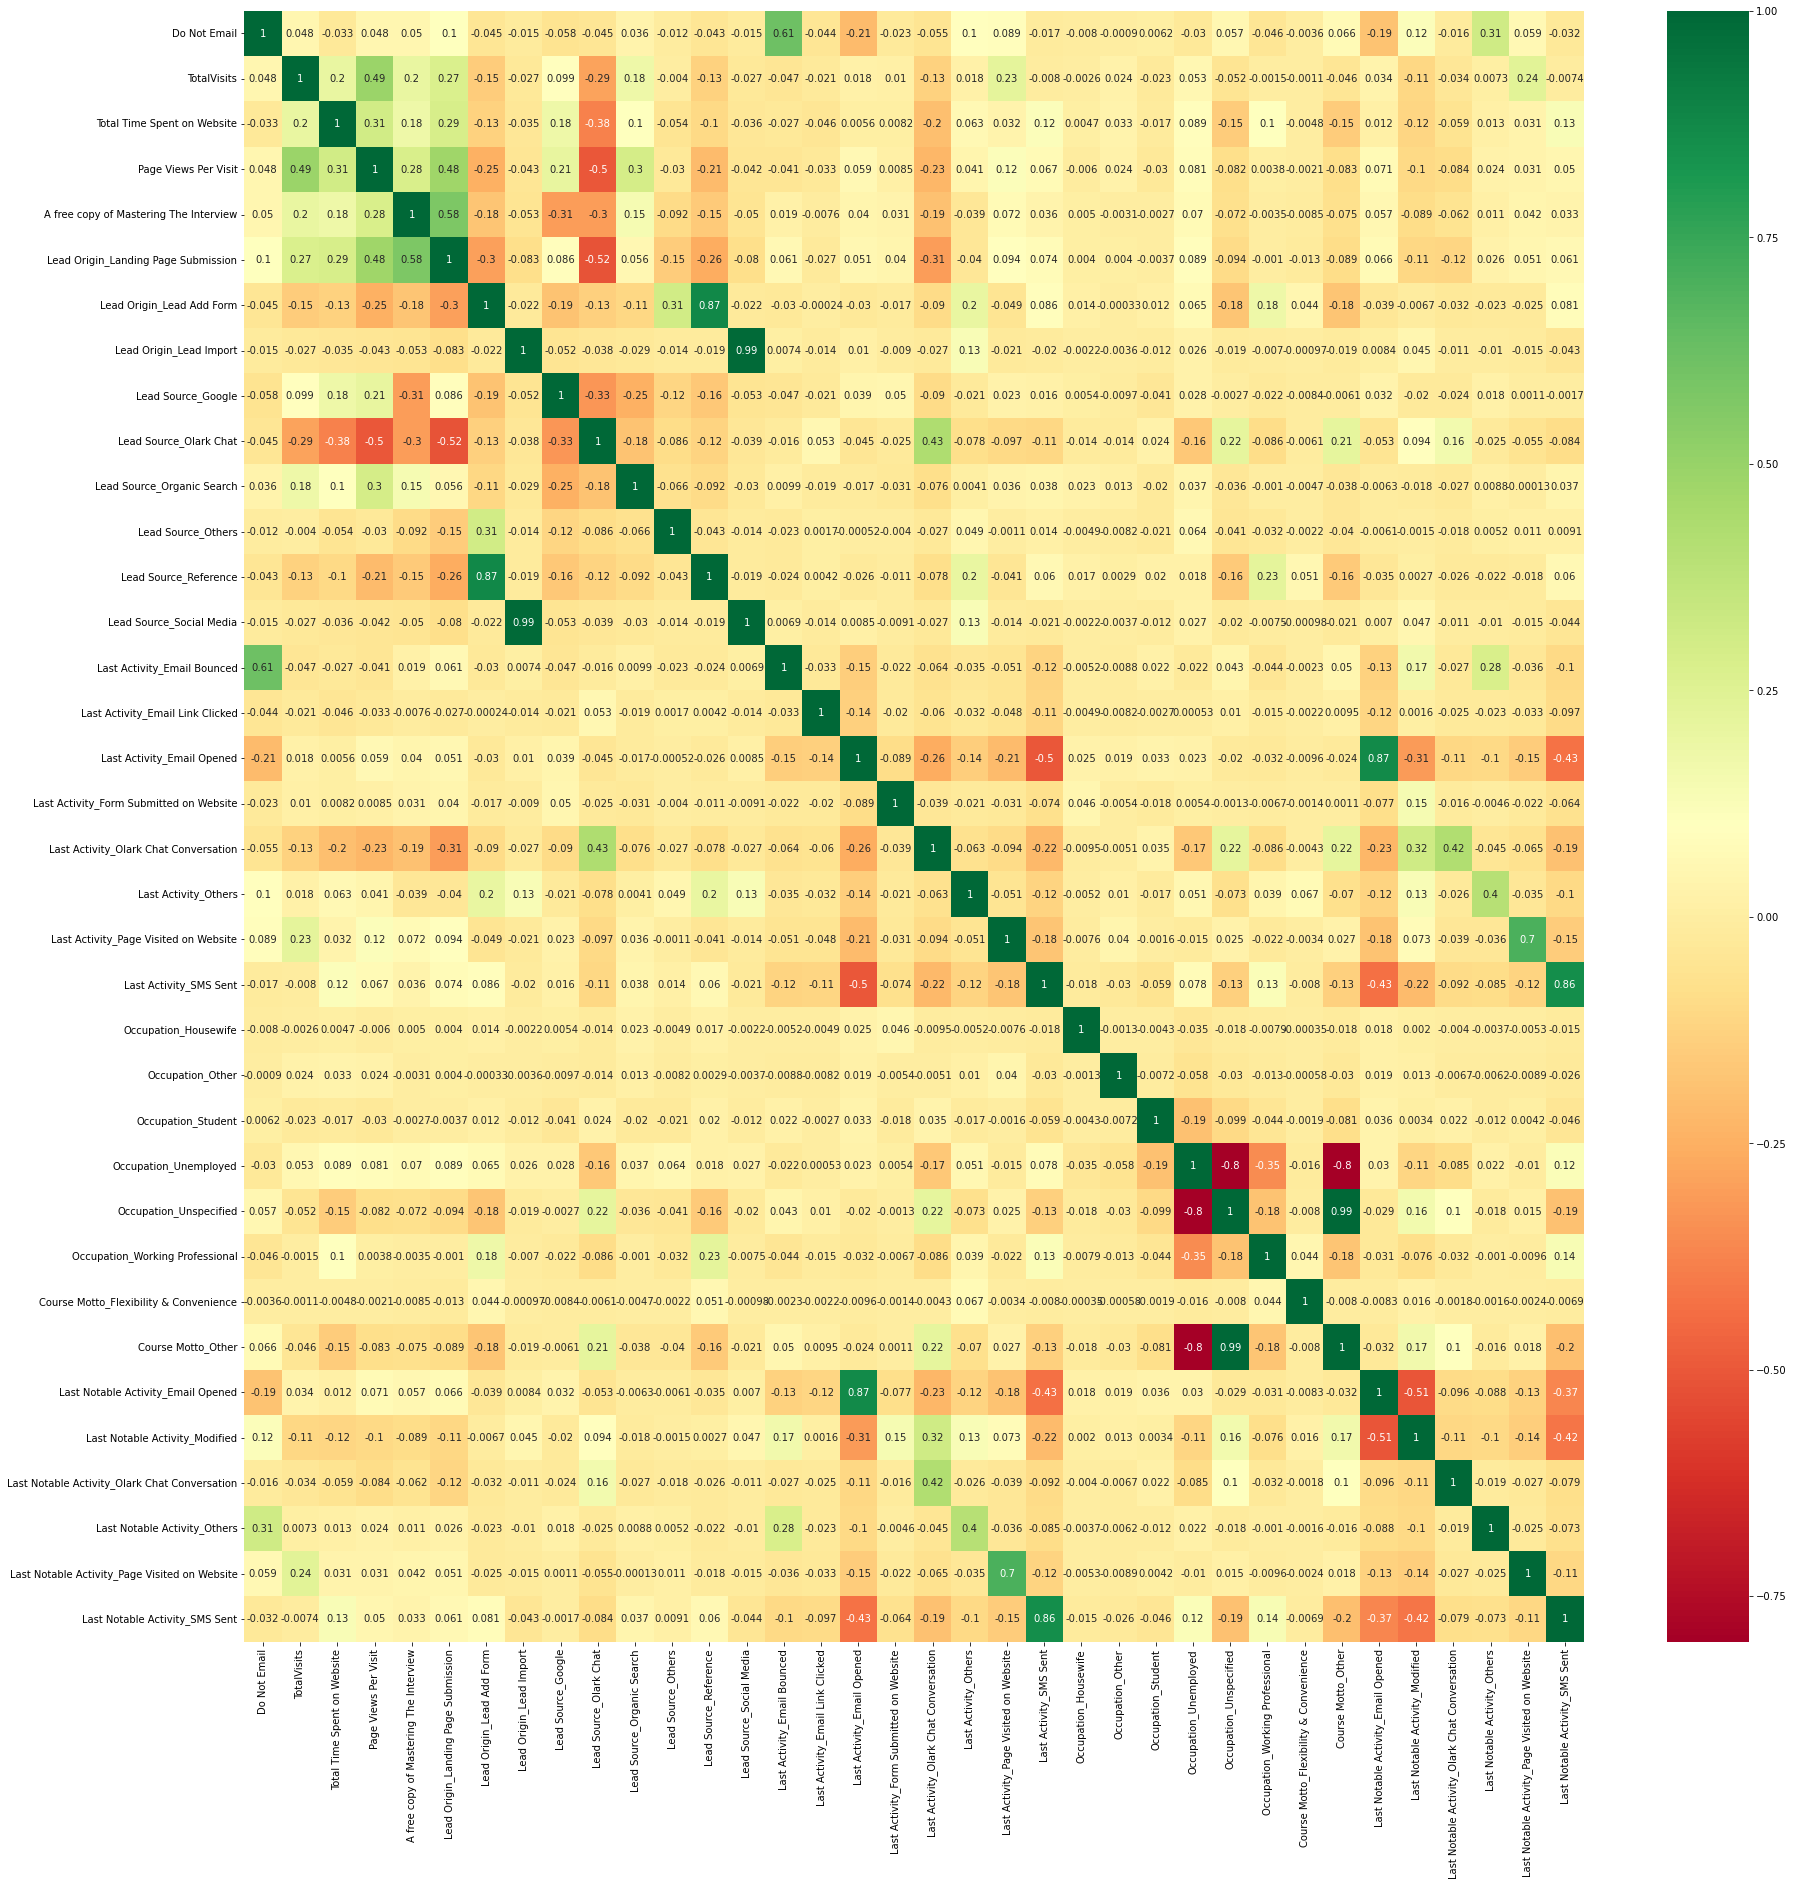

In [518]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30,30))
sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

In [519]:
# Dropping columns which are very highly correlated

X_train = X_train.drop(['Course Motto_Other', 'Occupation_Unspecified', 'Lead Origin_Lead Import',
                        'Last Activity_SMS Sent'], 1)

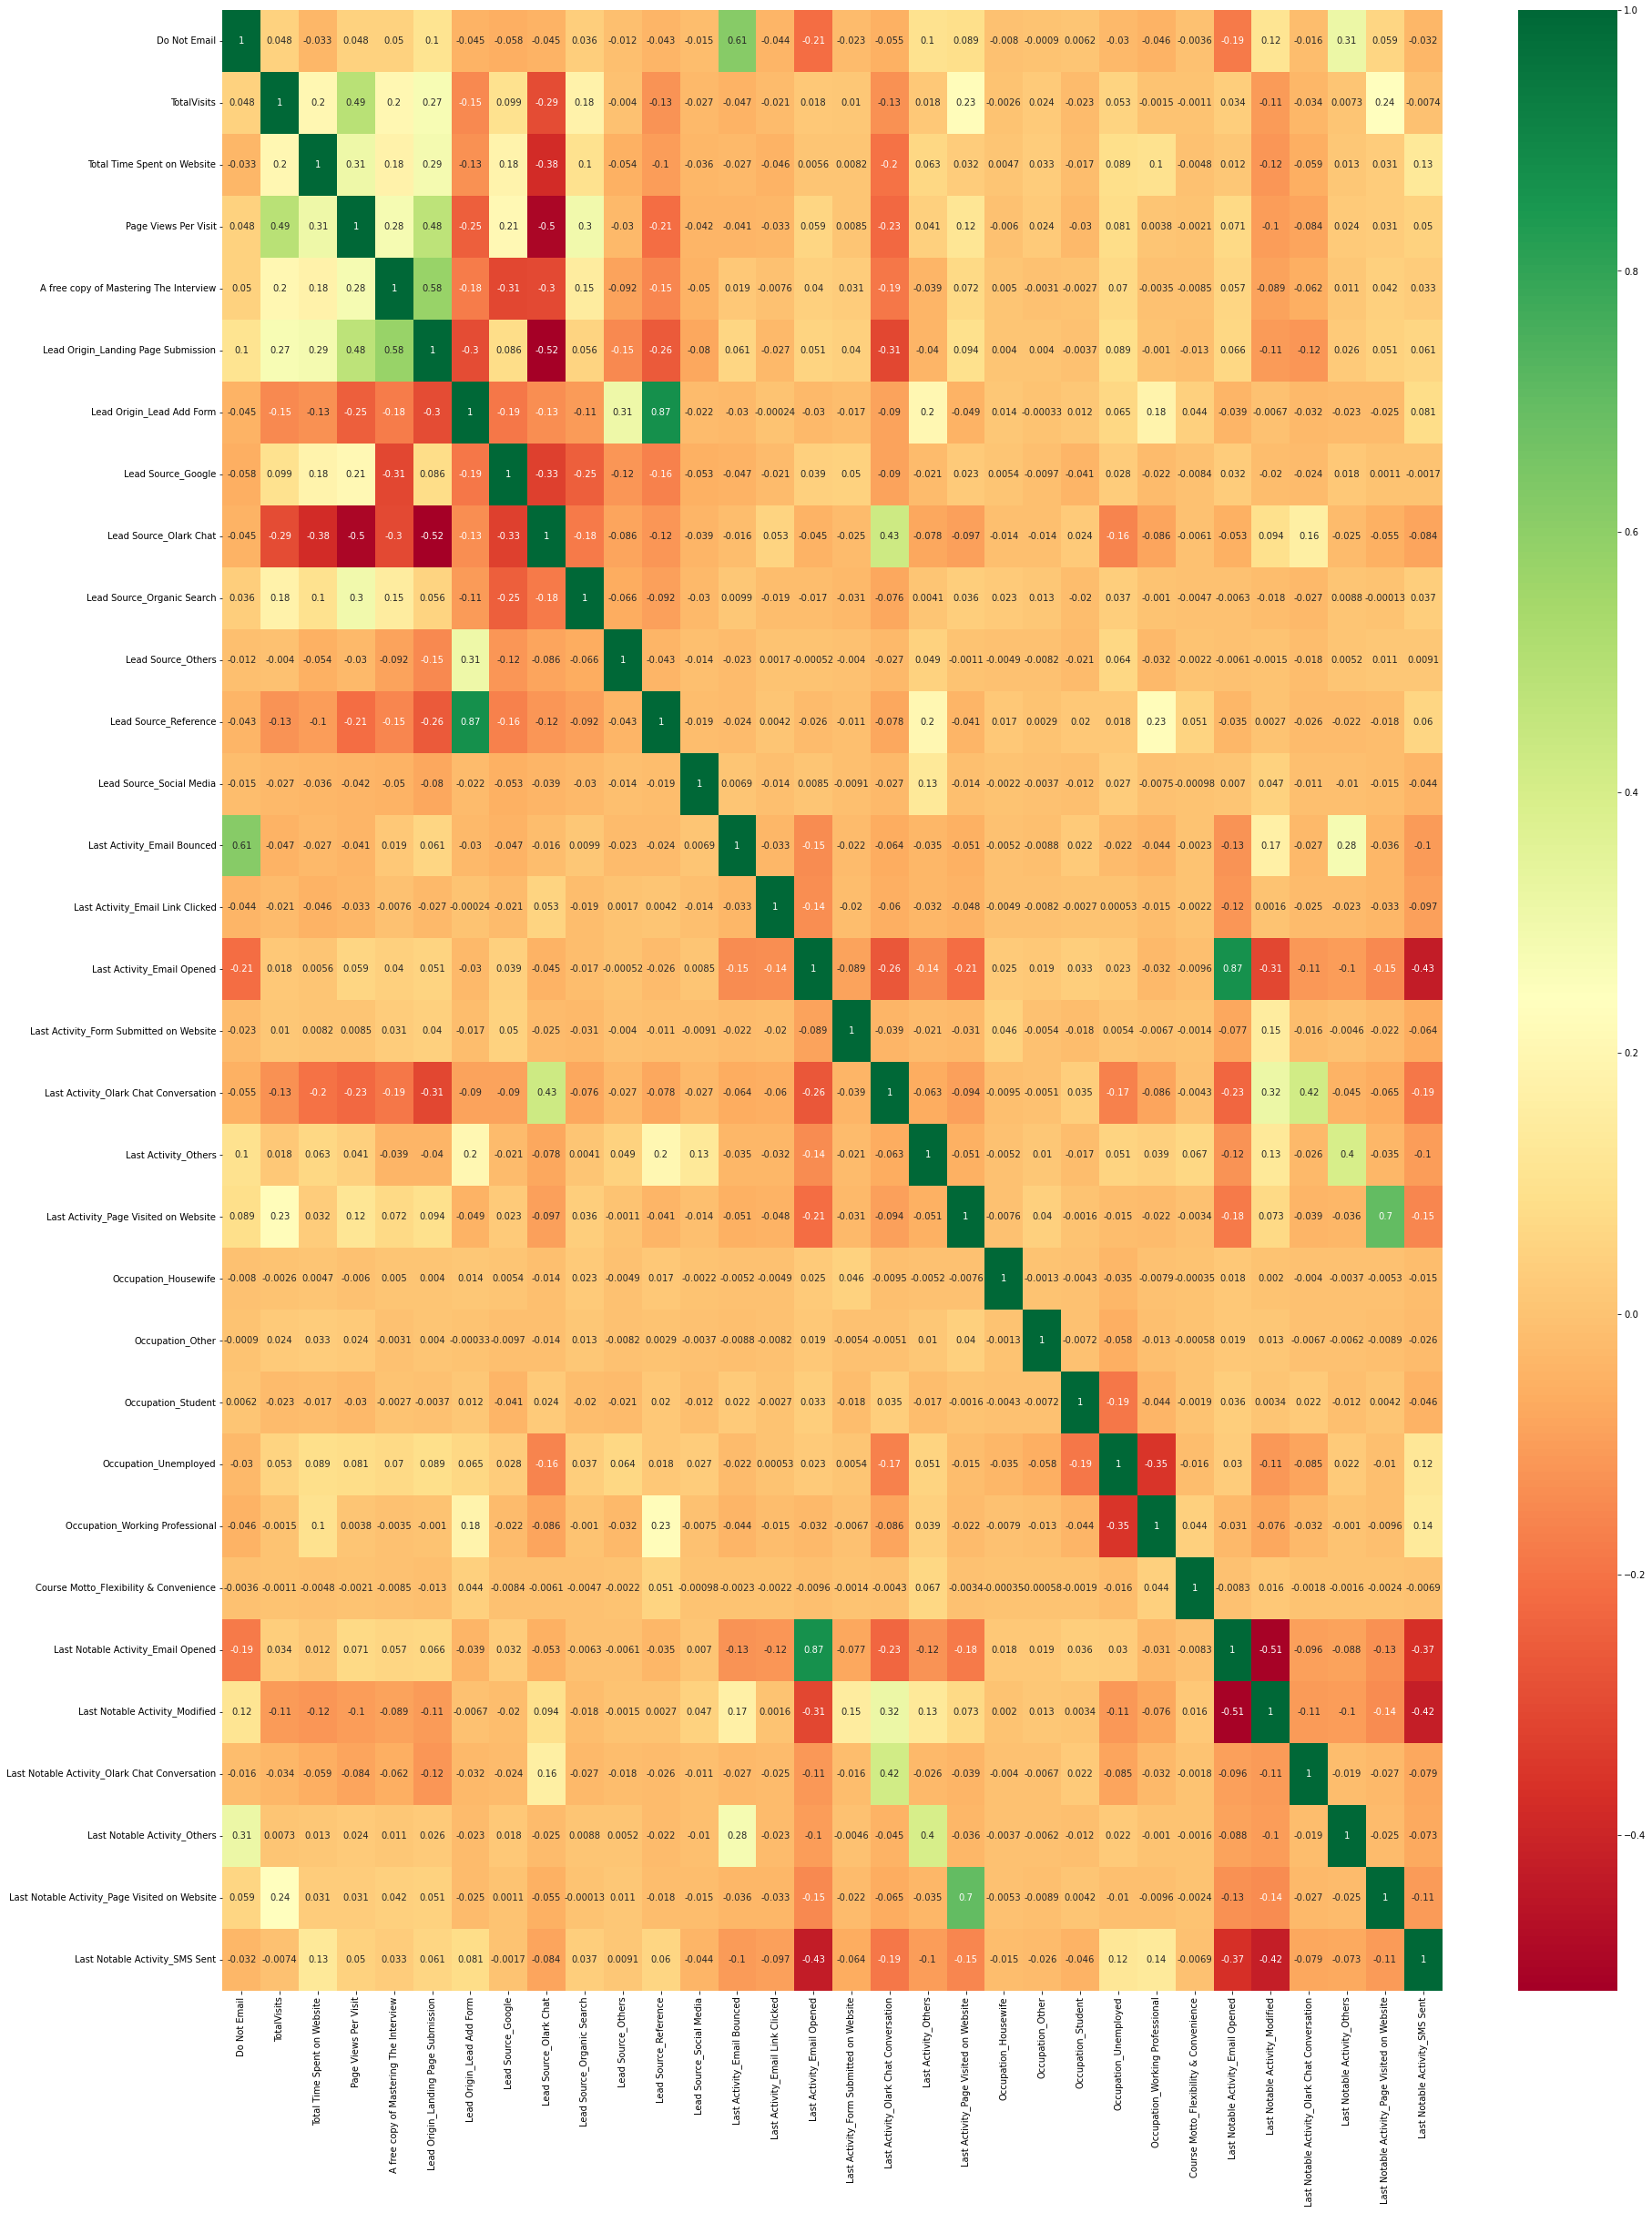

In [520]:
# After dropping highly correlated variables now let's check the correlation matrix again

plt.figure(figsize = (30,40))
sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#  **Segment - IV : Model Building**

In [521]:
#Instantiate the Logistic Regression Function
logreg = LogisticRegression()

## RFE

**Creating logistic regression model using a mixed approach. Starting with using RFE to find 15 variables and gradually dropping variables one by one manually.**

In [522]:
# Running RFE with the output number of the variables equal to 15

rfe = RFE(logreg,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [523]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('A free copy of Mastering The Interview', False, 16),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Others', False, 5),
 ('Lead Source_Reference', False, 10),
 ('Lead Source_Social Media', False, 4),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', False, 18),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 3),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', True, 1),
 ('Occupation_Student', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Occ

In [524]:
# Features SELECTED by RFE

X_train.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Occupation_Housewife',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional',
       'Course Motto_Flexibility & Convenience',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [525]:
# Features REJECTED by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website', 'Last Activity_Others',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [526]:
# Creating X_train_rfe dataframe with RFE selected variables

col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Course Motto_Flexibility & Convenience,Last Notable Activity_Others,Last Notable Activity_SMS Sent
6063,0,-0.891250,0,1,0,0,0,0,0,0,1,0,0,0,1
1836,0,1.463835,0,0,0,0,0,0,0,0,0,0,0,0,0
1431,0,-0.869393,0,0,0,0,1,0,0,0,1,0,0,0,0
3915,0,-0.891250,0,1,0,0,0,0,0,0,0,0,0,0,0
5806,0,-0.891250,1,0,0,0,0,0,0,0,0,1,0,0,0


## **Required conditions for feature selection :**

**1. p-value < 0.05** -- Drop features which are the least helpful in prediction (drop p-value > 0.05).

**2. VIF < 5** -- Drop features that are redundant using correlations and VIF (drop VIF > 5).

## Function for calculating VIF

**Variance Inflation Factor or VIF**, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating 'VIF' is:

$ VIF_i = \frac{1}{1 - {R_i}^2} $

In [527]:
# Defining a function for calculating VIF.
# We will be using this function to find the VIF for every model.

def findVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

## Model_1

In [528]:
# Calculating the VIFs for RFE selected predictors

findVIF(X_train_rfe)

,Features,VIF
0,Do Not Email,1.86
4,Last Activity_Email Bounced,1.74
3,Lead Source_Olark Chat,1.64
10,Occupation_Unemployed,1.58
14,Last Notable Activity_SMS Sent,1.44
5,Last Activity_Olark Chat Conversation,1.38
1,Total Time Spent on Website,1.26
2,Lead Origin_Lead Add Form,1.22
11,Occupation_Working Professional,1.19
13,Last Notable Activity_Others,1.16


In [529]:
# Adding a constant variable.

X_train_sm1 = sm.add_constant(X_train_rfe)

# Creating a fitted linear model
model_1 = sm.GLM(y_train, X_train_sm1, family = sm.families.Binomial()).fit()

# Summary of linear model
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.5
Date:                Sun, 11 Sep 2022   Deviance:                       5222.9
Time:                        14:39:36   Pearson chi2:                 6.79e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.2778      0.090    -25.342      0.000      -2.454      -2.102
Do Not Email                              -1.5056      0.203     -7.403      0.000      -1.904      -1.107
Total Time Spent on Website                1.1068      0.040     27.431      0.000       1.028       1.186
Lead Origin_Lead Add Form                  3.8519      0.199     19.384      0.000       3.462       4.241
Lead Source_Olark Chat                     1.3492      0.105     12.839      0.000       1.143       1.555
Last Activity_Email Bounced               -1.2500      0.370     -3.379      0.001      -1.975      -0.525
Last Activity_Olark Chat Conversation     -1.3659      0.168     -8.148      0.000      -1.694      -1.037
Last Activity_Page Visited on Website     -0.5085      0.152     -3.339      0.001      -0.807      -0.210
Occupation_Housewife                      24.3582   1.89e+04      0.001      0.999    -3.7e+04    3.71e+04
Occupation_Other                           1.8515      0.608      3.047      0.002       0.660       3.043
Occupation_Student                         1.2866      0.227      5.660      0.000       0.841       1.732
Occupation_Unemployed                      1.1818      0.089     13.224      0.000       1.007       1.357
Occupation_Working Professional            3.5994      0.199     18.107      0.000       3.210       3.989
Course Motto_Flexibility & Convenience   -27.3136   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Last Notable Activity_Others               1.8440      0.297      6.210      0.000       1.262       2.426
Last Notable Activity_SMS Sent             1.4859      0.082     18.158      0.000       1.326       1.646
==========================================================================================================
"""

In [530]:
# Dropping 'Course Motto_Flexibility & Convenience' because of very high p-value (1.000)

X_train_new = X_train_rfe.drop(['Course Motto_Flexibility & Convenience'], axis = 1)


## Model_2 

In [531]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
0,Do Not Email,1.86
4,Last Activity_Email Bounced,1.74
3,Lead Source_Olark Chat,1.64
10,Occupation_Unemployed,1.58
13,Last Notable Activity_SMS Sent,1.44
5,Last Activity_Olark Chat Conversation,1.38
1,Total Time Spent on Website,1.26
2,Lead Origin_Lead Add Form,1.22
11,Occupation_Working Professional,1.19
12,Last Notable Activity_Others,1.16


In [532]:
# Adding a constant variable.

X_train_sm2 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_2 = sm.GLM(y_train, X_train_sm2, family = sm.families.Binomial()).fit()

# Summary of linear model
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.2
Date:                Sun, 11 Sep 2022   Deviance:                       5232.4
Time:                        14:39:36   Pearson chi2:                 6.85e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2774      0.090    -25.345      0.000      -2.453      -2.101
Do Not Email                             -1.5030      0.203     -7.402      0.000      -1.901      -1.105
Total Time Spent on Website               1.1058      0.040     27.428      0.000       1.027       1.185
Lead Origin_Lead Add Form                 3.8159      0.196     19.431      0.000       3.431       4.201
Lead Source_Olark Chat                    1.3474      0.105     12.829      0.000       1.142       1.553
Last Activity_Email Bounced              -1.2470      0.369     -3.377      0.001      -1.971      -0.523
Last Activity_Olark Chat Conversation    -1.3650      0.168     -8.147      0.000      -1.693      -1.037
Last Activity_Page Visited on Website    -0.5072      0.152     -3.333      0.001      -0.805      -0.209
Occupation_Housewife                     23.3593   1.15e+04      0.002      0.998   -2.25e+04    2.25e+04
Occupation_Other                          1.8521      0.607      3.049      0.002       0.661       3.043
Occupation_Student                        1.2885      0.227      5.674      0.000       0.843       1.734
Occupation_Unemployed                     1.1830      0.089     13.240      0.000       1.008       1.358
Occupation_Working Professional           3.5677      0.197     18.097      0.000       3.181       3.954
Last Notable Activity_Others              1.8421      0.297      6.210      0.000       1.261       2.424
Last Notable Activity_SMS Sent            1.4864      0.082     18.179      0.000       1.326       1.647
=========================================================================================================
"""

In [533]:
# Dropping 'Occupation_Housewife' because of very high p-value (0.998)

X_train_new = X_train_new.drop(['Occupation_Housewife'], axis = 1)

## Model_3

In [534]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
0,Do Not Email,1.86
4,Last Activity_Email Bounced,1.74
3,Lead Source_Olark Chat,1.64
9,Occupation_Unemployed,1.58
12,Last Notable Activity_SMS Sent,1.44
5,Last Activity_Olark Chat Conversation,1.38
1,Total Time Spent on Website,1.26
2,Lead Origin_Lead Add Form,1.22
10,Occupation_Working Professional,1.19
11,Last Notable Activity_Others,1.16


In [535]:
# Adding a constant variable.

X_train_sm3 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_3 = sm.GLM(y_train, X_train_sm3, family = sm.families.Binomial()).fit()

# Summary of linear model
model_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.6
Date:                Sun, 11 Sep 2022   Deviance:                       5249.3
Time:                        14:39:36   Pearson chi2:                 6.86e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2497      0.089    -25.255      0.000      -2.424      -2.075
Do Not Email                             -1.5032      0.203     -7.409      0.000      -1.901      -1.106
Total Time Spent on Website               1.1039      0.040     27.434      0.000       1.025       1.183
Lead Origin_Lead Add Form                 3.8240      0.196     19.471      0.000       3.439       4.209
Lead Source_Olark Chat                    1.3375      0.105     12.762      0.000       1.132       1.543
Last Activity_Email Bounced              -1.2480      0.369     -3.382      0.001      -1.971      -0.525
Last Activity_Olark Chat Conversation    -1.3711      0.167     -8.190      0.000      -1.699      -1.043
Last Activity_Page Visited on Website    -0.5140      0.152     -3.382      0.001      -0.812      -0.216
Occupation_Other                          1.8291      0.608      3.010      0.003       0.638       3.020
Occupation_Student                        1.2649      0.227      5.574      0.000       0.820       1.710
Occupation_Unemployed                     1.1595      0.089     13.065      0.000       0.986       1.333
Occupation_Working Professional           3.5432      0.197     18.002      0.000       3.157       3.929
Last Notable Activity_Others              1.8349      0.296      6.191      0.000       1.254       2.416
Last Notable Activity_SMS Sent            1.4797      0.082     18.120      0.000       1.320       1.640
=========================================================================================================
"""

In [536]:
# Dropping 'Occupation_Other' because of considerably high p-value

X_train_new = X_train_new.drop(['Occupation_Other'], axis = 1)

## Model_4

In [537]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
0,Do Not Email,1.86
4,Last Activity_Email Bounced,1.74
3,Lead Source_Olark Chat,1.64
8,Occupation_Unemployed,1.58
11,Last Notable Activity_SMS Sent,1.44
5,Last Activity_Olark Chat Conversation,1.38
1,Total Time Spent on Website,1.26
2,Lead Origin_Lead Add Form,1.22
9,Occupation_Working Professional,1.19
10,Last Notable Activity_Others,1.16


In [538]:
# Adding a constant variable.

X_train_sm4 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_4 = sm.GLM(y_train, X_train_sm4, family = sm.families.Binomial()).fit()

# Summary of linear model
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.1
Date:                Sun, 11 Sep 2022   Deviance:                       5258.2
Time:                        14:39:36   Pearson chi2:                 6.87e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2210      0.088    -25.223      0.000      -2.394      -2.048
Do Not Email                             -1.4925      0.203     -7.362      0.000      -1.890      -1.095
Total Time Spent on Website               1.1065      0.040     27.507      0.000       1.028       1.185
Lead Origin_Lead Add Form                 3.8332      0.196     19.519      0.000       3.448       4.218
Lead Source_Olark Chat                    1.3335      0.105     12.739      0.000       1.128       1.539
Last Activity_Email Bounced              -1.2574      0.369     -3.409      0.001      -1.980      -0.535
Last Activity_Olark Chat Conversation    -1.3718      0.167     -8.197      0.000      -1.700      -1.044
Last Activity_Page Visited on Website    -0.4986      0.152     -3.286      0.001      -0.796      -0.201
Occupation_Student                        1.2362      0.227      5.455      0.000       0.792       1.680
Occupation_Unemployed                     1.1314      0.088     12.877      0.000       0.959       1.304
Occupation_Working Professional           3.5140      0.196     17.895      0.000       3.129       3.899
Last Notable Activity_Others              1.8248      0.296      6.164      0.000       1.245       2.405
Last Notable Activity_SMS Sent            1.4741      0.082     18.067      0.000       1.314       1.634
=========================================================================================================
"""

In [539]:
model_4.params

const                                   -2.220974
Do Not Email                            -1.492468
Total Time Spent on Website              1.106520
Lead Origin_Lead Add Form                3.833198
Lead Source_Olark Chat                   1.333530
Last Activity_Email Bounced             -1.257378
Last Activity_Olark Chat Conversation   -1.371810
Last Activity_Page Visited on Website   -0.498636
Occupation_Student                       1.236217
Occupation_Unemployed                    1.131392
Occupation_Working Professional          3.513973
Last Notable Activity_Others             1.824814
Last Notable Activity_SMS Sent           1.474130
dtype: float64

# **Segment V : Model Evaluation**

## Predicting the training data with Model-4

In [540]:
# Getting the predicted values on the train set

# y_train_pred with final model --> model_4

y_train_pred = model_4.predict(X_train_sm4)
y_train_pred[:10]

6063    0.675220
1836    0.354067
1431    0.072412
3915    0.133122
5806    0.984327
8999    0.322515
8763    0.209028
827     0.346727
2204    0.057104
9171    0.617251
dtype: float64

In [541]:
y_train_pred.values

array([0.67522049, 0.35406668, 0.07241182, ..., 0.96200483, 0.18102293,
       0.06564996])

In [542]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.67522049, 0.35406668, 0.07241182, 0.13312228, 0.98432687,
       0.32251501, 0.20902772, 0.34672689, 0.05710441, 0.61725081])

In [543]:
y_train.head()

6063    1
1836    1
1431    0
3915    0
5806    1
Name: Converted, dtype: int64

In [544]:
y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Conversion_prob' : y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID
0,1,0.675220,6063
1,1,0.354067,1836
2,0,0.072412,1431
3,0,0.133122,3915
4,1,0.984327,5806


**Considering a generic cut-off value of 0.5 and creating a new column 'predicted' with 1 if Conversion_prob > 0.5 else 0.**

In [545]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted
0,1,0.675220,6063,1
1,1,0.354067,1836,0
2,0,0.072412,1431,0
3,0,0.133122,3915,0
4,1,0.984327,5806,1


**Confusion matrix**

In [546]:
# Creating a Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion


array([[3516,  454],
       [ 758, 1714]], dtype=int64)

In [547]:
TP = confusion[1,1]  # True positive 
TN = confusion[0,0]  # True negatives
FP = confusion[0,1]  # False positives
FN = confusion[1,0]  # False negatives

**Calculating Important Metrics**

**Sensitivity**

In [548]:
# Calculating 'Sensitivity' for the logistic regression model

TP / float(TP+FN)

0.6933656957928802

**Specificity**

In [549]:
# Calculating 'Specificity' for the logistic regression model

TN / float(TN+FP)

0.8856423173803526

**Accuracy, Recall, Precision, F1_score for initial model with 0.5 cutoff**

In [550]:
# Finding Accuracy, Recall, Precision, F1_score for initial model with 0.5 cutoff

print("Accuracy, Recall, Precision, F1_score for initial model with 0.5 cutoff : \n")

print("Accuracy: ", accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Recall: ", recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Precision: ", precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("F1-Score: ", f1_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy, Recall, Precision, F1_score for initial model with 0.5 cutoff : 

Accuracy:  0.8118596709096554
Recall:  0.6933656957928802
Precision:  0.790590405904059
F1-Score:  0.7387931034482758


In [551]:
# Calculating False Postive Rate (FPR)

print(FP/ float(TN+FP))

0.11435768261964735


## Plotting the ROC Curve

An ROC curve demonstrates the following things:

- It shows the tradeoff between 'Sensitivity' and 'Specificity' (any increase in Sensitivity will be accompanied by a decrease in Specificity).

- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [552]:
# Function for finding ROC

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [553]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_prob,
                                         drop_intermediate = False )

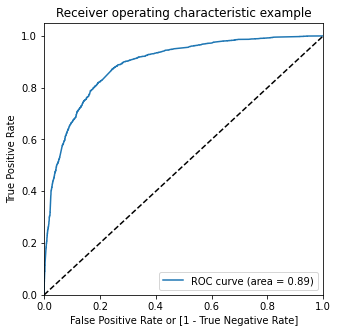

In [554]:
# Calling the function on 'y_train_pred_final.Converted' and 'y_train_pred_final.Conversion_prob'

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

**The ideal ROC value should be as close to 1 as possible. Here we are the getting 0.89 which is a very good value.**

## Finding Optimal Cutoff Point

**Previously we had chosen a random cutoff value of 0.5. But the 'Optimal Cutoff Point' is that probability value where we get balanced Sensitivity and Specificity**

In [555]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.675220,6063,1,1,1,1,1,1,1,1,0,0,0
1,1,0.354067,1836,0,1,1,1,1,0,0,0,0,0,0
2,0,0.072412,1431,0,1,0,0,0,0,0,0,0,0,0
3,0,0.133122,3915,0,1,1,0,0,0,0,0,0,0,0
4,1,0.984327,5806,1,1,1,1,1,1,1,1,1,1,1


In [556]:
# Now calculating 'Accuracy', 'Sensitivity' and 'Specificity' for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob-cutoff','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1]  # True positive 
# TN = confusion[0,0]  # True negatives
# FP = confusion[0,1]  # False positives
# FN = confusion[1,0]  # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensitivity, specificity]
print(cutoff_df)

     prob-cutoff  accuracy  sensitivity  specificity
0.0          0.0  0.383732     1.000000     0.000000
0.1          0.1  0.596709     0.980583     0.357683
0.2          0.2  0.766843     0.911812     0.676574
0.3          0.3  0.799286     0.874595     0.752393
0.4          0.4  0.816672     0.788430     0.834257
0.5          0.5  0.811860     0.693366     0.885642
0.6          0.6  0.806582     0.626618     0.918640
0.7          0.7  0.782366     0.514563     0.949118
0.8          0.8  0.765446     0.438511     0.969018
0.9          0.9  0.705526     0.254450     0.986398


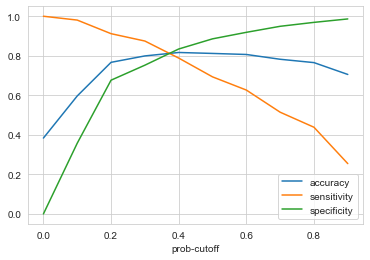

In [557]:
# Plotting 'Accuracy', 'Sensitivity' and 'Specificity' for various probability cut-off values.

sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob-cutoff', y=['accuracy','sensitivity','specificity'])
plt.show()

**From the curve above, 0.38 is the optimum point to take it as a cutoff probability.**

In [558]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.675220,6063,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.354067,1836,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.072412,1431,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.133122,3915,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.984327,5806,1,1,1,1,1,1,1,1,1,1,1,1


## Confusion matrix

In [559]:
# Creating a Confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3268,  702],
       [ 494, 1978]], dtype=int64)

In [560]:
TP = confusion2[1,1]  # True positive 
TN = confusion2[0,0]  # True negatives
FP = confusion2[0,1]  # False positives
FN = confusion2[1,0]  # False negatives

## Calculating Important Metrics

### Sensitivity

In [561]:
# Calculating 'Sensitivity'

TP / float(TP+FN)

0.8001618122977346

### Specificity

In [562]:
# Calculating 'Specificity'

TN / float(TN+FP)

0.8231738035264483

### Precision (TP / TP + FP) and Recall (TP / TP + FN)

**Accuracy, Recall, Precision, F1_score for probability cutoff 0.38**

In [563]:
# Finding Precision and Recall for probability cut off of 0.38

print("Accuracy, Recall, Precision, f1_score for probability cutoff 0.38 : \n")
print("Accuracy: ", accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("Recall: ", recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("Precision: ", precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("F1-Score: ", f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy, Recall, Precision, f1_score for probability cutoff 0.38 : 

Accuracy:  0.8143433716237194
Recall:  0.8001618122977346
Precision:  0.7380597014925373
F1-Score:  0.7678571428571429


## Precision and Recall tradeoff

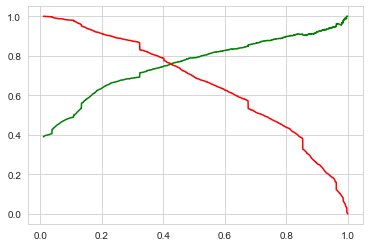

In [564]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [565]:
sns.set_style('ticks')

In [566]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.675220,6063,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.354067,1836,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.072412,1431,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.133122,3915,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.984327,5806,1,1,1,1,1,1,1,1,1,1,1,1


## Accuracy, Recall, Precision, F1_score based on Precision and Recall tradeoff on train data with cutoff as 0.42

In [567]:
# Accuracy, Recall, Precision, f1_score based on Precision and Recall tradeoff cutoff as 0.42


print("Accuracy, Recall, Precision, F1_score based on Precision and Recall tradeoff on train data with cutoff as 0.42 : \n")

print("Accuracy: ", accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("Recall: ", recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("Precision: ", precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("F1-Score: ", f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy, Recall, Precision, F1_score based on Precision and Recall tradeoff on train data with cutoff as 0.42 : 

Accuracy:  0.8148090655076063
Recall:  0.7629449838187702
Precision:  0.7565182511030887
F1-Score:  0.759718026183283


In [568]:
# Creating a Confusion matrix

confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3363,  607],
       [ 586, 1886]], dtype=int64)

In [569]:
TP = confusion3[1,1]  # True positive 
TN = confusion3[0,0]  # True negatives
FP = confusion3[0,1]  # False positives
FN = confusion3[1,0]  # False negatives

In [570]:
# Calculating 'Sensitivity'

TP / float(TP+FN)

0.7629449838187702

In [571]:
# Calculating 'Specificity'

TN / float(TN+FP)

0.847103274559194

In [572]:
# Calculating False Postive Rate (FPR)

print(FP/ float(TN+FP))

0.15289672544080604


# **Segment VI : Test Data**

## Rescaling features of test data

In [148]:
cont_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [149]:
X_test[cont_cols] = scaler.transform(X_test[cont_cols] )
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Social Media,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unspecified,Occupation_Working Professional,Course Motto_Flexibility & Convenience,Course Motto_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8832,0,0.860793,-0.295648,0.140010,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1891,0,-0.663511,-0.891250,-1.090587,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3108,0,-0.663511,-0.891250,-1.090587,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4427,0,-0.091897,-0.707287,-0.399240,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1481,0,-0.472973,0.624164,-0.629689,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [150]:
X_train_new.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [151]:
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]
X_test_new.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Others,Last Notable Activity_SMS Sent
8832,0,-0.295648,0,0,0,0,0,0,1,0,0,1
1891,0,-0.891250,0,1,0,1,0,0,0,0,0,0
3108,0,-0.891250,0,1,0,1,0,0,0,0,0,0
4427,0,-0.707287,0,0,0,0,0,0,1,0,0,0
1481,0,0.624164,0,1,0,0,0,0,0,1,0,0


In [152]:
#Checking Shape

X_test_new.shape

(2762, 12)

In [153]:
# Adding constant variable to test dataframe

X_test_sm = sm.add_constant(X_test_new)
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Others,Last Notable Activity_SMS Sent
8832,1.0,0,-0.295648,0,0,0,0,0,0,1,0,0,1
1891,1.0,0,-0.891250,0,1,0,1,0,0,0,0,0,0
3108,1.0,0,-0.891250,0,1,0,1,0,0,0,0,0,0
4427,1.0,0,-0.707287,0,0,0,0,0,0,1,0,0,0
1481,1.0,0,0.624164,0,1,0,0,0,0,0,1,0,0


## Predictions on Test data using Final Model

In [154]:
# Making predictions using the final model :  model_4

y_test_pred = model_4.predict(X_test_sm)
y_test_pred[:10]

8832    0.514348
1891    0.037491
3108    0.037491
4427    0.133286
1481    0.965013
2662    0.996367
7359    0.206793
2115    0.865560
8649    0.042236
1954    0.113689
dtype: float64

In [155]:
# Converting y_test_pred from an array to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
8832,0.514348
1891,0.037491
3108,0.037491
4427,0.133286
1481,0.965013


In [156]:
y_test.head()

8832    0
1891    0
3108    0
4427    0
1481    1
Name: Converted, dtype: int64

In [157]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
8832,0
1891,0
3108,0
4427,0
1481,1


In [158]:
# Putting CustID to index

y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
8832,0,8832
1891,0,1891
3108,0,3108
4427,0,4427
1481,1,1481


In [159]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Concatenating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8832,0.514348
1,0,1891,0.037491
2,0,3108,0.037491
3,0,4427,0.133286
4,1,1481,0.965013


In [160]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_prob'})
y_pred_final.head()

,Converted,Prospect ID,Conversion_prob
0,0,8832,0.514348
1,0,1891,0.037491
2,0,3108,0.037491
3,0,4427,0.133286
4,1,1481,0.965013


In [161]:
# Re-arranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Conversion_prob']]
y_pred_final.head()

,Prospect ID,Converted,Conversion_prob
0,8832,0,0.514348
1,1891,0,0.037491
2,3108,0,0.037491
3,4427,0,0.133286
4,1481,1,0.965013


In [162]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Prospect ID,Converted,Conversion_prob,final_predicted
0,8832,0,0.514348,1
1,1891,0,0.037491,0
2,3108,0,0.037491,0
3,4427,0,0.133286,0
4,1481,1,0.965013,1


## Assigning a Lead Score

In [163]:
# Assigning a Lead Score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 

y_pred_final['Lead_Score'] = y_pred_final.Conversion_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Conversion_prob,final_predicted,Lead_Score
0,8832,0,0.514348,1,51
1,1891,0,0.037491,0,4
2,3108,0,0.037491,0,4
3,4427,0,0.133286,0,13
4,1481,1,0.965013,1,97


## Accuracy, Recall, Precision, F1_score on Test data of final model with 0.42 cutoff

In [164]:
# Finding Accuracy, Recall, Precision, f1_score on Test data of final model with 0.42 cutoff

print("Accuracy, Recall, Precision, F1_score on test data with final model with 0.42 cutoff : \n")

print("Accuracy: ", accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("Recall: ", recall_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("Precision: ", precision_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("F1-Score: ", f1_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy, Recall, Precision, F1_score on test data with final model with 0.42 cutoff : 

Accuracy:  0.8106444605358436
Recall:  0.7547169811320755
Precision:  0.7525870178739417
F1-Score:  0.753650494583137


In [165]:
confusion4 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion4

array([[1439,  263],
       [ 260,  800]], dtype=int64)

In [166]:
TP = confusion4[1,1]  # True positive 
TN = confusion4[0,0]  # True negatives
FP = confusion4[0,1]  # False positives
FN = confusion4[1,0]  # False negatives

In [167]:
# Calculating 'Sensitivity'

TP / float(TP+FN)

0.7547169811320755

In [168]:
# Calculating 'Specificity'

TN / float(TN+FP)

0.845475910693302

In [173]:
# Calculating False Postive Rate (FPR)

print(FP/ float(TN+FP))

0.154524089306698


In [181]:
y_pred_final['final_predicted'].value_counts()

0    1699
1    1063
Name: final_predicted, dtype: int64

In [176]:
y_pred_final.shape[0]

(2762, 5)

In [179]:
y_pred_final['final_predicted'].sum()/y_pred_final.shape[0]

0.38486603910209993

# **Summary and Recommendations**

In [172]:
round(model_4.params, 3)

const                                   -2.221
Do Not Email                            -1.492
Total Time Spent on Website              1.107
Lead Origin_Lead Add Form                3.833
Lead Source_Olark Chat                   1.334
Last Activity_Email Bounced             -1.257
Last Activity_Olark Chat Conversation   -1.372
Last Activity_Page Visited on Website   -0.499
Occupation_Student                       1.236
Occupation_Unemployed                    1.131
Occupation_Working Professional          3.514
Last Notable Activity_Others             1.825
Last Notable Activity_SMS Sent           1.474
dtype: float64

In [171]:
X_test_new.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')


***Accuracy, Recall, Precision, F1_score based on Precision and Recall tradeoff on TRAIN DATA with cutoff as 0.42 :***

- Accuracy:  0.8148090655076063
- Recall:  0.7629449838187702
- Precision:  0.7565182511030887
- F1-Score:  0.759718026183283






***Accuracy, Recall, Precision, F1_score on TEST DATA with final model with 0.42 cutoff :***

- Accuracy:  0.8106444605358436
- Recall:  0.7547169811320755
- Precision:  0.7525870178739417
- F1-Score:  0.753650494583137


**The following variables affect the Conversion rate :**
 
- Do Not Email = -1.492
- Total Time Spent on Website = 1.107
- Lead Origin_Lead Add Form = 3.833
- Lead Source_Olark Chat = 1.334
- Last Activity_Email Bounced = -1.257
- Last Activity_Olark Chat Conversation = -1.372
- Last Activity_Page Visited on Website = -0.499
- Occupation_Student = 1.236
- Occupation_Unemployed = 1.131
- Occupation_Working Professional = 3.514
- Last Notable Activity_Others = 1.825
- Last Notable Activity_SMS Sent = 1.474


**The top 3 features which are contributing significantly towards the probability of a lead getting converted are the following :**

***1. Occupation_Working Professional*** : Indicates whether the customer is a student, unemployed or employed. It can be seen that 'Working Professionals' have the highest chances to corvert to a customer.


***2. Lead Origin_Lead Add Form and Lead Source_Olark Chat***: Lead Origin and LEad Source also play an important role in increasing the probability of lead conversion.


***3. Last Notable Activity_SMS Sent*** : The last notable acitivity where the student has sent an SMS seems to play an important role. It can be the sign of an interest customer.



**Increase in these factors will also increase the probability of lead conversion, so these factors should be given an equal importance**

1. Occupation_Student
2. Occupation_Unemployed
3. Total Time Spent on Website 
